# FURB - Curso de Especialização em Data Science
## Disciplina Deep Learning
### Trabalho Final

**Professor: Luan Porfirio e Silva**

**Aluno: Mauro Schramm**



* A implementação seguiu o roteiro passado pelo professor (reproduzido abaixo).
* Para treinar o modelo é necessário carregar o *csv* com os dados de treinamento e executar todas as células de código sequencialmente.
* Arquivo *csv* baixado de [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).
* Para utilizar o modelo já treinado é preciso executar as duas primeiras células de código e então fazer a carga do modelo [nesta célula de código](#scrollTo=IL_cpL7WhLwz&line=1&uniqifier=1).
* Foram avaliadas diversas combinações de valores para os hiperâmetros *learning rate* (0.001, 0.005 e 0.002) *epochs* (10, 15 e 20) e *embedding dim* (16, 32 e 64). A configuração final ficou como segue, obtendo uma acurácia em torno de 87%:
```
LEARNING_RATE = .002
EPOCHS = 20
EMBEDDING_DIM = 32
HIDDEN_SIZE = 32
BATCH_SIZE = 64
```
* A implementação foi construída a partir da solução apresentada no tutorial [Análise de sentimento usando LSTM no PyTorch](https://medium.com/turing-talks/an%C3%A1lise-de-sentimento-usando-lstm-no-pytorch-d90f001eb9d7). 




### Classificação de textos para análise de sentimentos

Base de dados 

Istruções:
- O objetivo deste trabalho é criar um modelo binário de aprendizado de máquina para classificação de textos. 
Para isso, será utilizado a base de dados [IMDb](http://ai.stanford.edu/~amaas/data/sentiment/), que consiste de dados textuais de críticas positivas e negativas de filmes
- Uma vez treinado, o modelo deve ter uma função `predict` que recebe uma string como parâmetro e retorna o valor 1 ou 0, aonde 1 significa uma crítica positiva e 0 uma crítica negativa
- O pré-processamento pode ser desenvolvidado conforme desejar (ex.: remoção de stopwords, word embedding, one-hot encoding, char encoding)
- É preferível que seja empregado um modelo de recorrência (ex.: rnn, lstm, gru) para a etapa de classificação
- Documente o código (explique sucintamente o que cada função faz, insira comentários em trechos de código relevantes)
- **Atenção**: Uma vez treinado o modelo final, salve-o no diretório do seu projeto e crie uma célula ao final do notebook contendo uma função de leitura deste arquivo, juntamente com a execução da função `predict`

Sugestões:
- Explorar a base de dados nas células iniciais do notebook para ter um melhor entendimento do problema, distribuição dos dados, etc
- Após desenvolver a estrutura de classificação, é indicado fazer uma busca de hiperparâmetros e comparar os resultados obtidos em diferentes situações

Prazo de entrega:
- 01-08-2021 às 23:59hs GMT-3

Formato preferível de entrega:
- Postar no portal Ava da disciplina o link do projeto no github (ou anexar o projeto diretamente no portal Ava)

luann.porfirio@gmail.com

## Passos iniciais

-instalação da biblioteca pytorch-nlp

-importação das bibliotecas necessária

-definição dos hiperparâmetros

-definição da classe com o modelo da rede neural recorrente

obs: as duas células a seguir sevem ser executadas antes de fazer a carga do modelo treinado.

In [77]:
pip install pytorch-nlp

In [78]:
#imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchnlp.encoders.text import SpacyEncoder, pad_tensor
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

# definição dos hiperparâmetros
LEARNING_RATE = .002
EPOCHS = 20
EMBEDDING_DIM = 32
HIDDEN_SIZE = 32
BATCH_SIZE = 64


# definição do modelo usando rede neural recorrente LSTM
class IMDB_LSTM(nn.Module):
    def __init__(self, enco, max_len):
        super(IMDB_LSTM, self).__init__()
        #guarda o encoder no modelo para uso na função predict
        self.encoder = enco
        self.max_lenght = max_len

        #vetor denso representado as palavras e suas dimensões
        self.embedding = nn.Embedding(len(self.encoder.vocab)+1, EMBEDDING_DIM)
        #definição da camada com rede de recorrência LSTM
        self.lstm = nn.LSTM(EMBEDDING_DIM, HIDDEN_SIZE, batch_first=True)
        #definição da camada totalmente conectada
        self.fc1 = nn.Linear(HIDDEN_SIZE, 2)
        
    def forward(self, x):
        # gera as dimensões
        x_ = self.embedding(x)
        x_, (h_n, c_n) = self.lstm(x_)

        # passa para a camada fc somente a predição da última "camada" hidden 
        x_ = (x_[:, -1, :])
        x_ = self.fc1(x_)
        return x_

    # faz a predição para um texto
    # parâmetro:
    #    rev - string com uma frase com a crítica de algum filme (review), em língua inglesa
    # retorno:
    #    "sentimento" sobre a crítica em forma numérica: 0=negativo; 1=positivo
    def predict (self, rev):
        # põe o modelo em modo de predição
        self.eval()
 
        #trunca texto longo
        if len(rev) >= self.max_lenght:
          rev = text[0:max_lenght]
        #encode do texto
        enc_rev = self.encoder.encode(rev)
        #completa com zeros até o tamanho máximo
        enc_revs = []
        enc_revs.append(pad_tensor(enc_rev, int(self.max_lenght)))
        #cria o tensor
        x = torch.stack(enc_revs)

        #executa a predição
        preds = self(x)
        #extrai o valor do tensor
        pred = preds.argmax(dim=1)[0].item()

        return pred

## Carga da base de dados e preparação dos dados

In [79]:
#base de dados carregada no Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#carga da base de dados
df = pd.read_csv('drive/MyDrive/DeepLearning/IMDB Dataset.csv')


In [81]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [82]:
#checando a distribuição dos labels (sentimento)
(df['sentiment'] =='positive').mean()

0.5

In [83]:
#transforma features (review) e labels (sentiment) em listas
review_as_list = df['review'].tolist()
sentiment_as_list = df['sentiment'].tolist()

In [84]:
#cria o encoder (com o vocabulário) que será usado para fazer a representação numérica das palavras
%%time
encoder = SpacyEncoder(review_as_list)

CPU times: user 1min 16s, sys: 379 ms, total: 1min 16s
Wall time: 1min 16s


In [85]:
#checando o tamanho do vocabulários
encoder.vocab_size

176599

In [86]:
#testando o encoder
print(encoder.decode(encoder.encode("A charming film, with an excellent script and great actors.")))
print(encoder.decode(encoder.encode("Um filme encantador, com roteiro execelente e ótimos atores.")))

A charming film , with an excellent script and great actors .
Um filme <unk> , com <unk> <unk> e <unk> <unk> .


In [87]:
#criando a representação numérica para as palavras do texto
%%time
encoded_reviews = []
for i in tqdm(range(len(review_as_list))):
    encoded_reviews.append(encoder.encode(review_as_list[i]))


CPU times: user 1min 20s, sys: 1.79 s, total: 1min 22s
Wall time: 1min 19s


In [88]:
#checando o tmanho das frases dos reviews para identificar outliers
%%time
lengths = [len(i) for i in tqdm(encoded_reviews)]


CPU times: user 96.1 ms, sys: 3.96 ms, total: 100 ms
Wall time: 97.3 ms


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


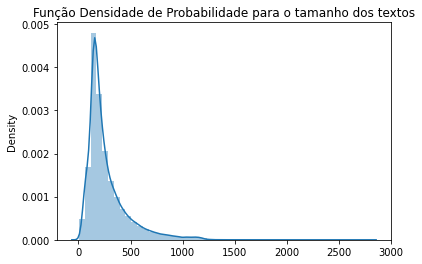

In [89]:
#plotando a função densidade de probabilidade para o tamanho dos textos
length_as_series = pd.Series(lengths)
plt.title("Função Densidade de Probabilidade para o tamanho dos textos")
sns.distplot(length_as_series)

In [90]:
#definindo o tamanho máximo das reviews (excluir os 10% mais longos)
max_pad_length = length_as_series.quantile(0.9)
max_pad_length

526.0

In [91]:
#eliminando outliers (reviews com tamanho > max_pad_lenght) e
#tranformando os labels (sentimentos) em 0 (negtive) e 1 (positive)
%%time
reviews = []
sentiments = []

for i in tqdm(range(len(encoded_reviews))):
    if len(encoded_reviews[i]) <= max_pad_length:
        reviews.append(encoded_reviews[i])
        sentiments.append(1 if sentiment_as_list[i] == "positive" else 0)
        
assert len(reviews) == len(sentiments), "Feature e labels devem ter o mesmo tamanho"


CPU times: user 136 ms, sys: 3.23 ms, total: 139 ms
Wall time: 136 ms


In [92]:
#preenchendo os textos (numericamente representados) com zeros (até max_pad_length)
%%time
padded_dataset = []
for i in tqdm(range(len(reviews))):
    padded_dataset.append(pad_tensor(reviews[i], int(max_pad_length)))


CPU times: user 1.27 s, sys: 147 ms, total: 1.41 s
Wall time: 1.4 s


In [93]:
#checando tamanho dos textos preenchidos
print(padded_dataset[0].shape)
print(padded_dataset[1].shape)

torch.Size([526])
torch.Size([526])


In [94]:
#preparando a versão definitiva dos dados
#tranformando lista de tensors em tensor
X = torch.stack(padded_dataset)
y = torch.tensor(sentiments)

In [95]:
#checando features e labels
print(X.shape)
print(y.shape)
print(X)

torch.Size([45008, 526])
torch.Size([45008])
tensor([[    5,     6,     7,  ...,     0,     0,     0],
        [  215,   216,   217,  ...,     0,     0,     0],
        [  159,   307,    29,  ...,     0,     0,     0],
        ...,
        [  159,  1697,    58,  ...,     0,     0,     0],
        [  159,  1028,   408,  ...,     0,     0,     0],
        [ 1057,   269, 10199,  ...,     0,     0,     0]])


In [96]:
#separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [97]:
#criando os datasets que serão iterados
ds_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True)

ds_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=BATCH_SIZE, shuffle=True)

## Instanciação e treinamento do modelo

In [98]:
# Instanciação do modelo
model = IMDB_LSTM(encoder, max_pad_length)
device = torch.device('cpu')
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [99]:
# Treinamento do modelo
#define barra de progresso do treinamento
trainning_bar = tqdm(range(EPOCHS),
                 desc="Training",
                 position=0,
                 total=EPOCHS)

acc = 0

#iterando as épocas
for epoch in trainning_bar:
    #define barra de progresso de cada época
    epoch_bar = tqdm(enumerate(train_loader),
                     desc="Epoch: {}".format(str(epoch)),
                     position=1,
                     total=len(train_loader))
    
    #iterando os batches dentro de cada época
    for i, (datapoints, labels) in epoch_bar:
        
        optimizer.zero_grad()
        
        preds = model(datapoints.long())
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        #checa acurácia ao final de cada época
        if i == len(train_loader)-1:
          preds = model(X_test)
          acc = (preds.argmax(dim=1) == y_test).float().mean().cpu().item() 
    
        #atualiza a barra de progresso da época
        epoch_bar.set_postfix(loss=loss.cpu().item(),
                              accuracy="{:.2f}".format(acc),
                              epoch=epoch)
        epoch_bar.update()

    #atualiza a barra de progresso geral
    trainning_bar.set_postfix(loss=loss.cpu().item(),
                          accuracy="{:.2f}".format(acc),
                          epoch=epoch)
    trainning_bar.update()

## Salvando o modelo treinado

In [100]:
#salvando o modelo treinado na raiz do sistema de arquivos notebook
torch.save(model, 'imdb_classifier.pt')

## Carga do modelo treinado


**Antes de carregar o modelo treinado** é necessário **"compilar" a classe do modelo**.

Para isso, deve-se **executar, em ordem, as três 2 primeiras células do notebook, com link abaixo:**

[instalar pytorch-nlp](#scrollTo=8nFC2KBnWne-&line=1&uniqifier=1)

[imports, hiperparâmetros e definição da classeIMDB_SLTM ](#scrollTo=D9jBejHqWHAT&line=3&uniqifier=1)


In [101]:

#carregando o modelo treinado da raiz do sistema de arquivos do notebook
model = torch.load('imdb_classifier.pt')
model.eval()

IMDB_LSTM(
  (embedding): Embedding(176600, 32)
  (lstm): LSTM(32, 32, batch_first=True)
  (fc1): Linear(in_features=32, out_features=2, bias=True)
)

In [102]:
model.predict("the movie is awful")

0

In [103]:
model.predict("the movie is wonderful")

1